----
----
# Clustering (Customer Segmentation) Project
----
----

This is a medium size project of ***Machine Learning*** course. 

At the end of this project, we will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

After getting to know the data set quickly, we are going to perform ***Exploratory Data Analysis***. We should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then we will specify the different variables to use for cluster analysis.

Finally, we should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

---
---

# Action Plan


#### 1. Importing Libraries, Loading Dataset, Exploring Data

#### 2. Exploratory Data Analysis (EDA)

#### 3. Cluster Analysis

- Clustering with K-means

    *i. Creating a new datasets with our intuition*
    
    *ii. Determining optimal number of clusters*
    
    *iii. Applying K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
- Hierarchical Clustering

    *i. Determining optimal number of clusters using Dendogram*

    *ii. Applying Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Loading Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membership card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. We have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
# Data and Stats packages
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["axes.grid"] = False

#### Load Dataset

In [5]:
mall = pd.read_csv('Mall_Customers.csv', index_col=0)

In [6]:
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explore Data

We can rename columns to more usable.

In [7]:
mall.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [8]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
mall.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [10]:
mall.describe(include='all', percentiles=[.25,.5,.75,.95])

,Gender,Age,Annual_Income,Spending_Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [11]:
mall = mall.replace({'Female':1, 'Male':0})

In [12]:
mall.head()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, we need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. We apply data visualization techniques. Observing breakpoints will help us to internalize the data.

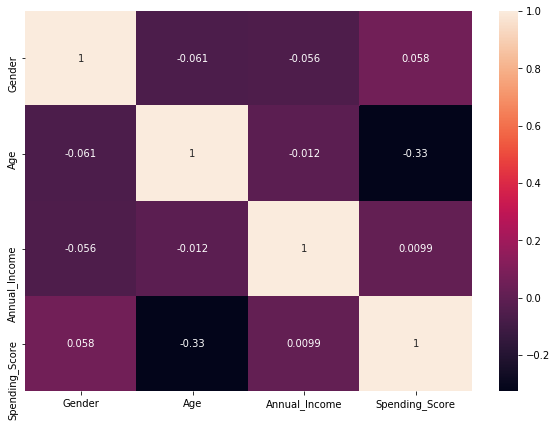

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(mall.corr(), annot=True)

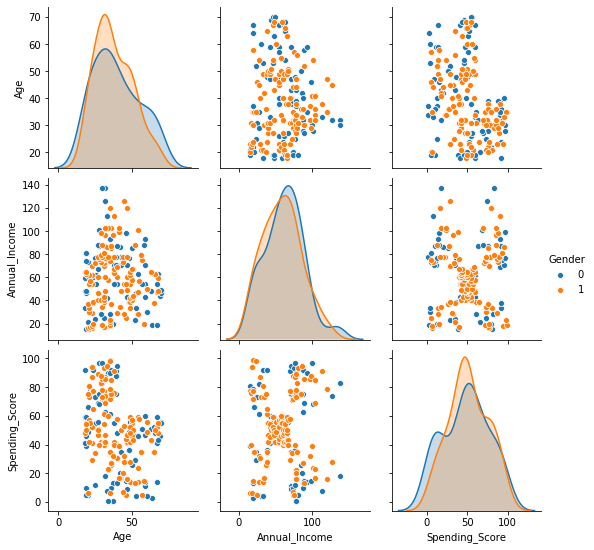

In [14]:
sns.pairplot(mall, hue='Gender')

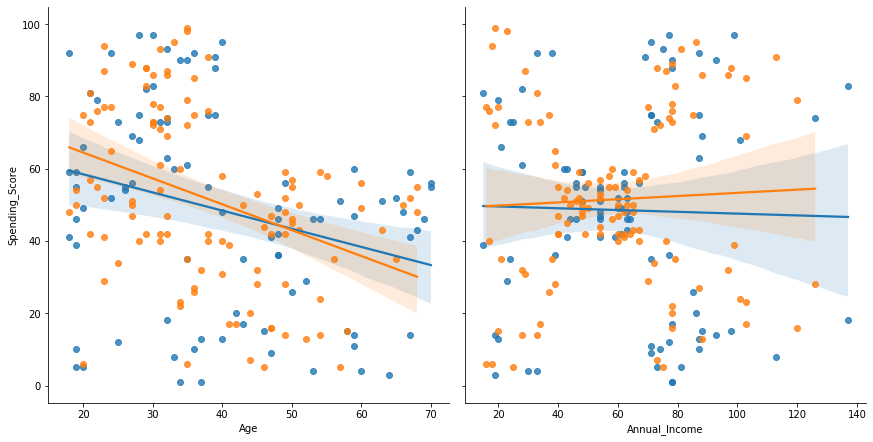

In [15]:
g = sns.PairGrid(mall, y_vars=['Spending_Score'], x_vars=["Age", "Annual_Income"], height=6, hue='Gender')
g.map(sns.regplot)

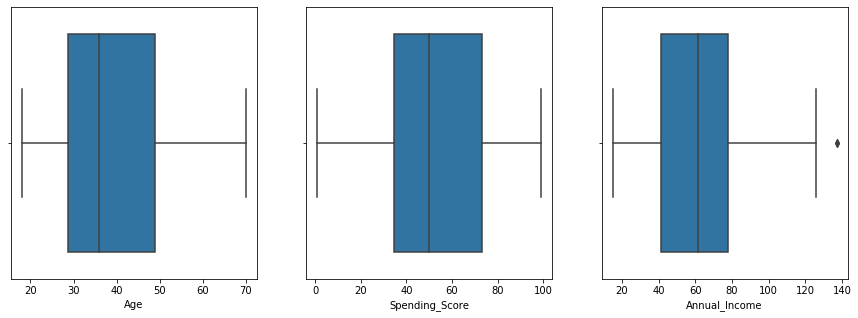

In [16]:
f, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(mall.Age, ax=ax[0])
sns.boxplot(mall['Spending_Score'], ax=ax[1])
sns.boxplot(mall['Annual_Income'], ax=ax[2])

#### Visualizing with Autoviz.
** This is a really powerful tool to have some valuable insights about our data.**

In [17]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (200, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


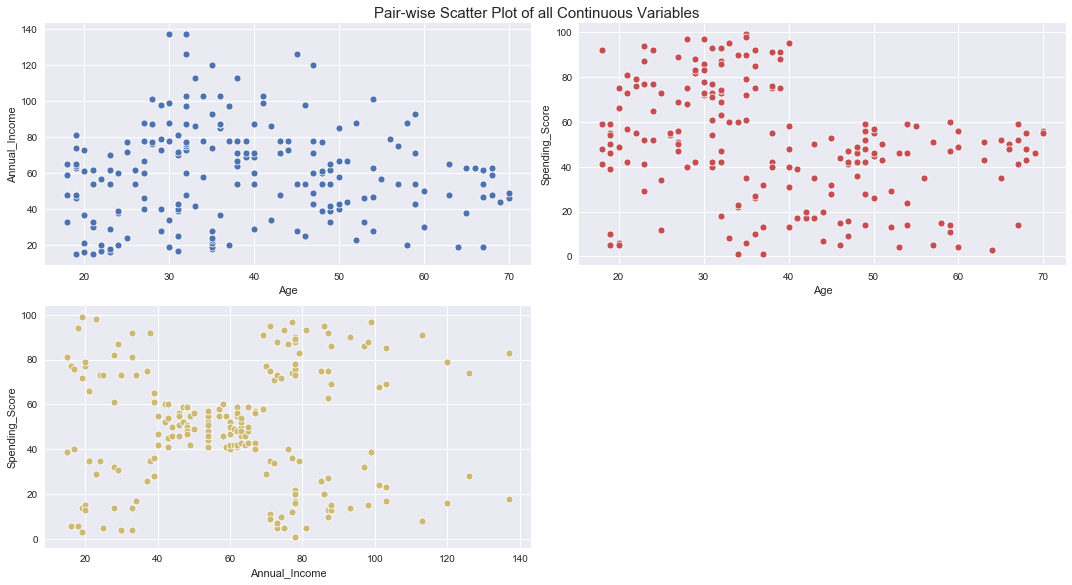

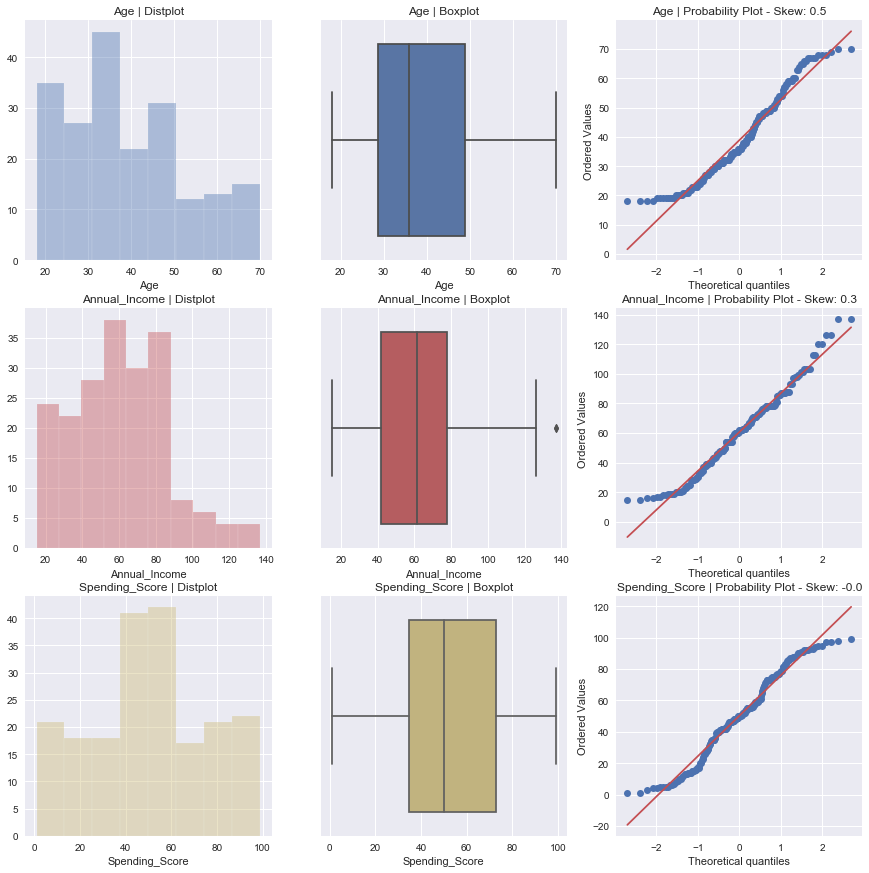

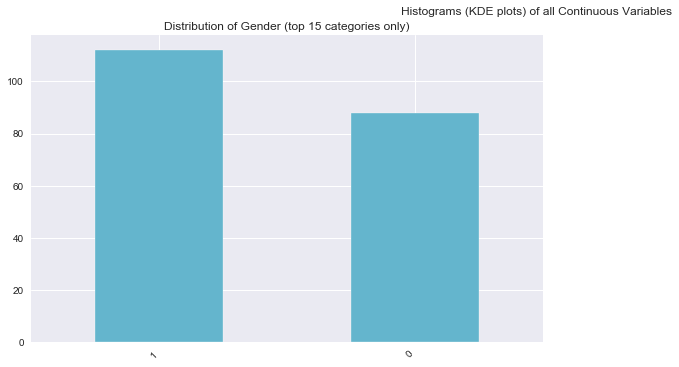

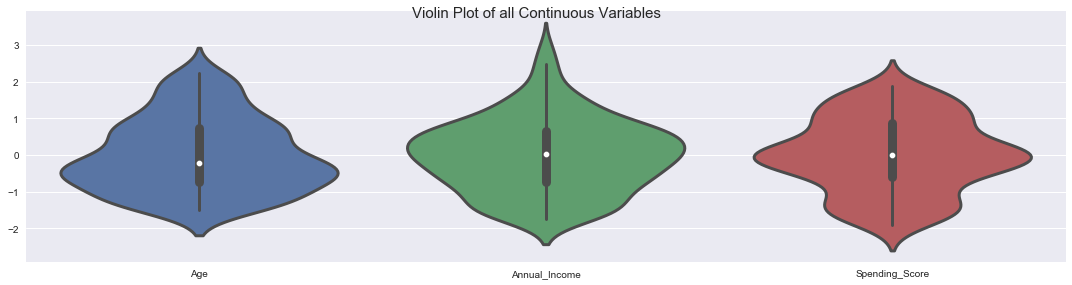

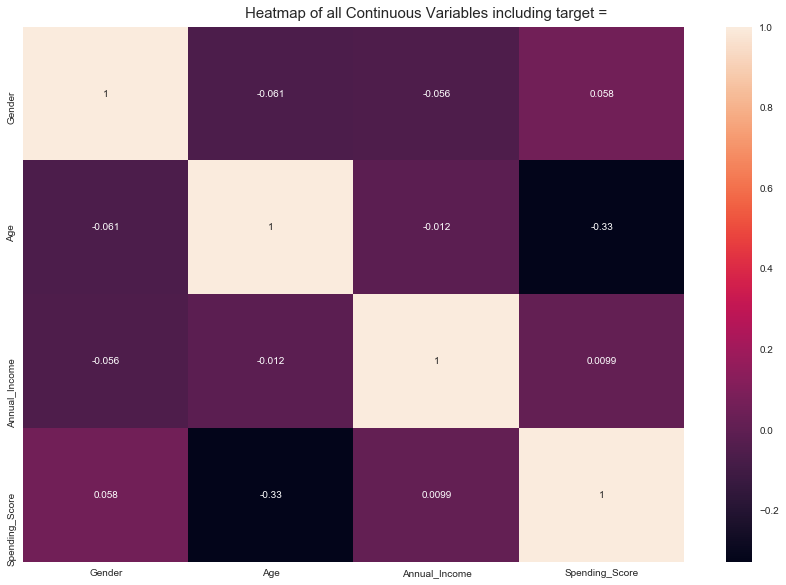

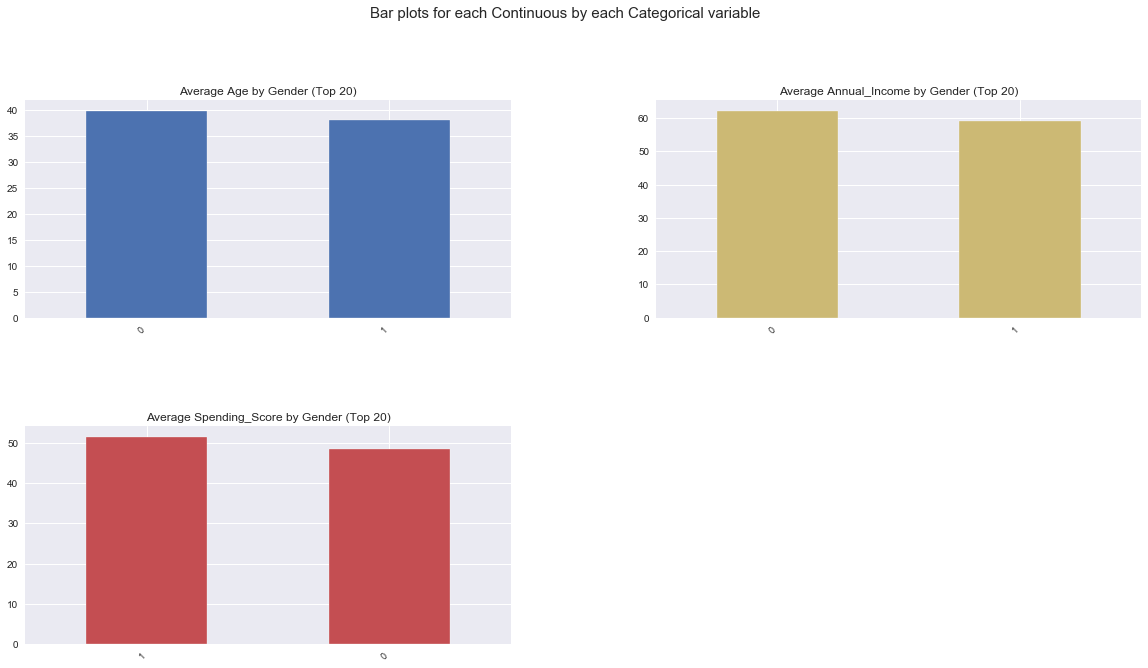

Time to run AutoViz (in seconds) = 4.687

 ###################### VISUALIZATION Completed ########################


In [18]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar='',
    dfte=mall,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=250,
    max_cols_analyzed=6,
)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 
We can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If we use a maximum of two variables for each cluster analysis, we can identify cluster labels more clearly.
First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). We can determine the optimal number of clusters for each cluster analysis in various ways. In this case, We use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).
Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 
Labeling example: 
- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering for whole dataset with K-Means

#### *i. Preprocessing our dataset to clustering*

While CustomerID doesn't contain meaningful information for the clustering purposes we have dropped this column. On the other hand, as Gender consists of cathegorical data and k-means algorithm isn't directly applicable to categorical variables (because Euclidean distance function isn't really meaningful for discrete variables) we may drop this column too. However, Gender might contain valuable insights for our model we also have an option to use group_by method to see Gender effect.
Let's have both a gender based and general data frames and apply all process to all data frames (mall_g, mall_m, mall_f).

In [19]:
from pyclustertend import hopkins
hopkins(mall,mall.shape[0])

0.3067940378966277

In [20]:
mall_g = mall.drop(columns = ['Gender'], axis=1)
mall_g.head()

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [23]:
hopkins(mall_g,mall_g.shape[0])

0.30343353242937665

In [21]:
mall_f = mall[mall.Gender==1].drop(columns = ['Gender'], axis=1)
mall_f.head(3)

,Age,Annual_Income,Spending_Score
CustomerID,,,
3,20,16,6
4,23,16,77
5,31,17,40


In [24]:
hopkins(mall_f,mall_f.shape[0])

0.34209933867607645

In [22]:
mall_m = mall[mall.Gender==0].drop(columns = ['Gender'], axis=1)
mall_m.head(3)

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
9,64,19,3


In [25]:
hopkins(mall_m,mall_m.shape[0])

0.328791100365157

** Since our dataset do not have features with different magnitudes and we are likely to have an equally distribution, we do not need to scale our data frames for this time. **

#### *ii. Determine optimal number of clusters*

We are going to use Elbow Method to determine optimum K value.

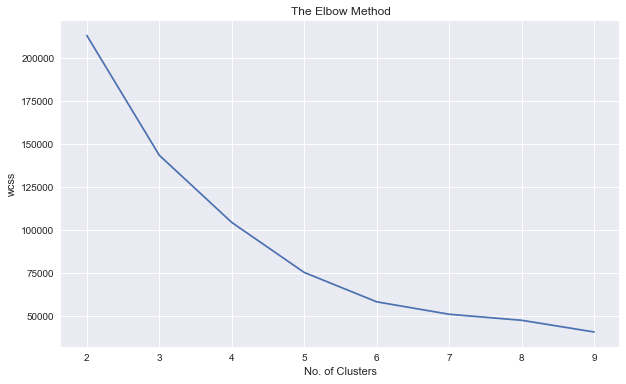

In [28]:
from sklearn.cluster import KMeans

wcss =[]
for n in range(2,10):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(mall_g)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

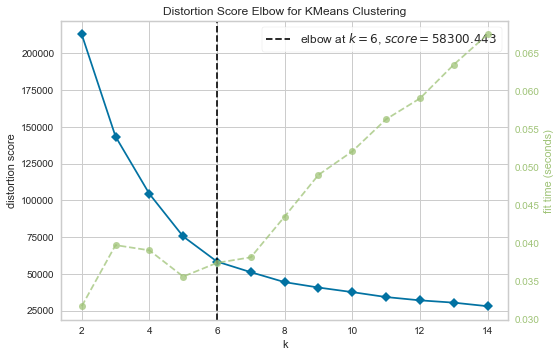

In [29]:
## Lets do the same with yellowbrick!
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,15))

visualizer.fit(mall_g)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

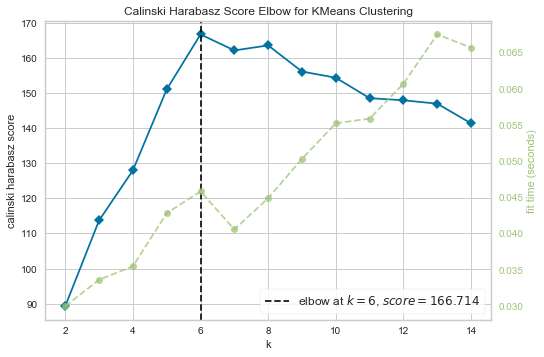

In [30]:
# Also we can change the metric

visualizer = KElbowVisualizer(KMeans(), k=(2,15), metric='calinski_harabasz')

visualizer.fit(mall_g)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

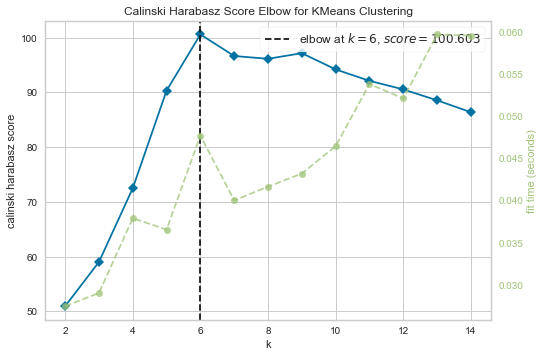

In [36]:
# Instantiate the clustering model and visualizer for female dataset

visualizer = KElbowVisualizer(KMeans(), k=(2,15), metric='calinski_harabasz')

visualizer.fit(mall_f)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

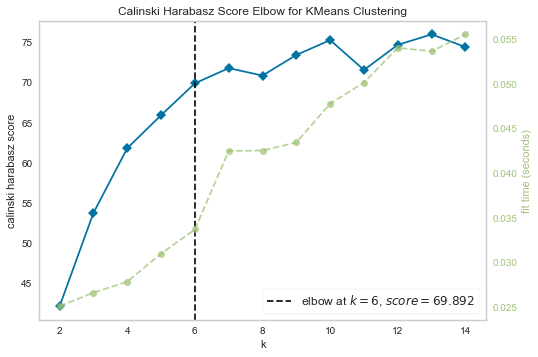

In [51]:
# Instantiate the clustering model and visualizer for male dataset
visualizer = KElbowVisualizer(KMeans(), k=(2,15), metric='calinski_harabasz')
visualizer.fit(mall_m)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

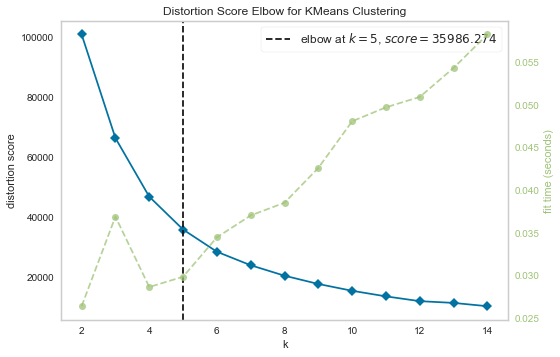

In [52]:
# calinski_harabasz gave a weird k value, trying the same with euclidean.
# Instantiate the clustering model and visualizer for male dataset
visualizer = KElbowVisualizer(KMeans(), k=(2,15))

visualizer.fit(mall_m)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### *iii. Apply K Means*

** Using elbow method, we apply the best k-values to our model.**

In [40]:
k_means = KMeans(init = "k-means++", n_clusters =6, n_init = 12)
k_means.fit(mall_g)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
mall_g['customer_type']=k_means.labels_

In [42]:
mall_g.head(4)

,Age,Annual_Income,Spending_Score,customer_type
CustomerID,,,,
1,19,15,39,0
2,21,15,81,4
3,20,16,6,0
4,23,16,77,4


In [43]:
k_means_f = KMeans(init = "k-means++", n_clusters =6, n_init = 12)
k_means_f.fit(mall_f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
mall_f['customer_type']=k_means_f.labels_

In [45]:
mall_f.head(3)

,Age,Annual_Income,Spending_Score,customer_type
CustomerID,,,,
3,20,16,6,0
4,23,16,77,2
5,31,17,40,0


In [46]:
k_means_m = KMeans(init = "k-means++", n_clusters=5, n_init = 12)
k_means_m.fit(mall_m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
mall_m['customer_type']=k_means_m.labels_

In [48]:
mall_m.head(3)

,Age,Annual_Income,Spending_Score,customer_type
CustomerID,,,,
1,19,15,39,2
2,21,15,81,2
9,64,19,3,0


#### *iv. Visualizing and Labeled Clusters*

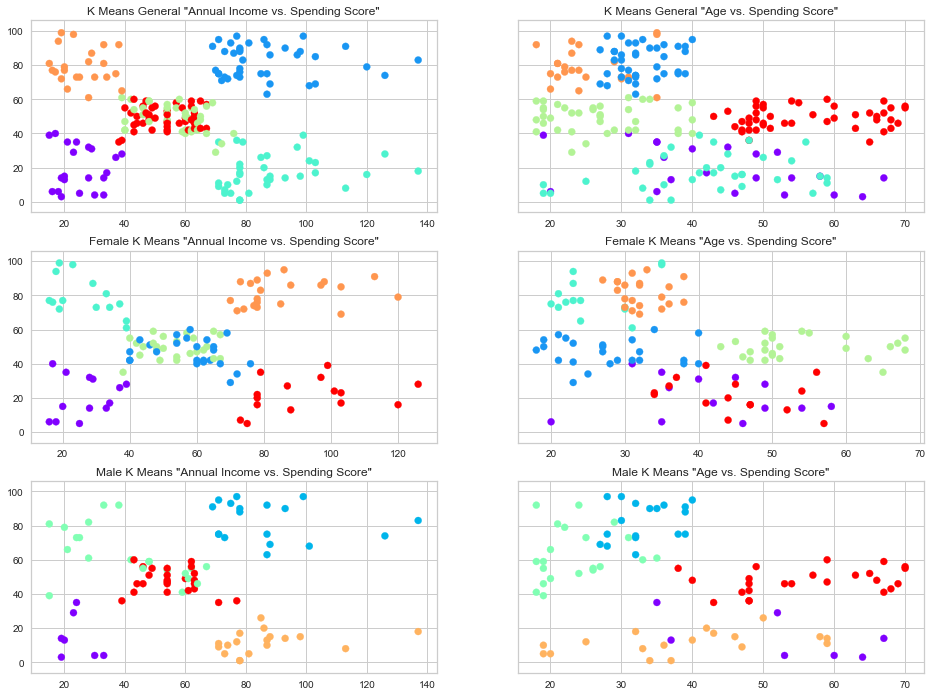

In [49]:
f, ax = plt.subplots(3, 2, sharey=True,figsize=(16,12))
plt.rcParams["axes.grid"] = False
ax[0,0].set_title('K Means General "Annual Income vs. Spending Score"')
ax[0,0].scatter(mall_g['Annual_Income'],mall_g['Spending_Score'],c=mall_g['customer_type'],cmap='rainbow')
ax[0,1].set_title('K Means General "Age vs. Spending Score"')
ax[0,1].scatter(mall_g['Age'],mall_g['Spending_Score'],c=mall_g['customer_type'],cmap='rainbow')

ax[1,0].set_title('Female K Means "Annual Income vs. Spending Score"')
ax[1,0].scatter(mall_f['Annual_Income'],mall_f['Spending_Score'],c=mall_f['customer_type'],cmap='rainbow')
ax[1,1].set_title('Female K Means "Age vs. Spending Score"')
ax[1,1].scatter(mall_f['Age'],mall_f['Spending_Score'],c=mall_f['customer_type'],cmap='rainbow')

ax[2,0].set_title('Male K Means "Annual Income vs. Spending Score"')
ax[2,0].scatter(mall_m['Annual_Income'],mall_m['Spending_Score'],c=mall_m['customer_type'],cmap='rainbow')
ax[2,1].set_title('Male K Means "Age vs. Spending Score"')
ax[2,1].scatter(mall_m['Age'],mall_m['Spending_Score'],c=mall_m['customer_type'],cmap='rainbow')

Visually having 5 clusters instead of 6 could be more reasonable. However we can not decide just for visual aspect. Let's ignore age and make whole process with a so called simplified data frames :

mall_is: Annual income and Spending Score.

mall_as: Age and Spending Score. 

### Clustering based on Annual Income and Spending Score

#### *i. Creating a simplified dataset*

In [53]:
mall_is =  mall.drop(columns = ['Gender', 'Age'], axis=1)
mall_is.head()

,Annual_Income,Spending_Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [54]:
from pyclustertend import hopkins
hopkins(mall_is,mall_is.shape[0])

0.2968616601360542

#### *ii. Determine optimal number of clusters*

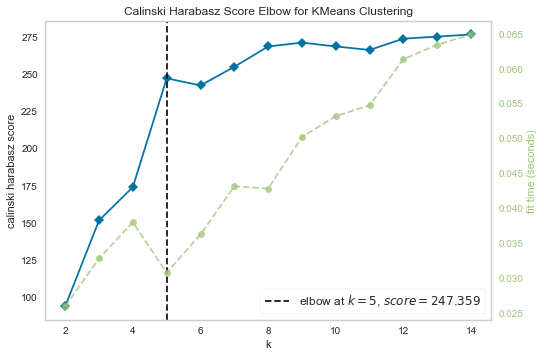

In [55]:
# Instantiate the clustering model and visualizer
k_means_model = KMeans()
visualizer = KElbowVisualizer(k_means_model, k=(2,15), metric='calinski_harabasz')

visualizer.fit(mall_is)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### *iii. Apply K Means*

In [56]:
k_means_is = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_is.fit(mall_is)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
mall_is['customer_type']=k_means_is.labels_
mall_is

,Annual_Income,Spending_Score,customer_type
CustomerID,,,
1,15,39,1
2,15,81,2
3,16,6,1
4,16,77,2
5,17,40,1
...,...,...,...
196,120,79,0
197,126,28,3
198,126,74,0


#### *iv. Visualizing and Labeling All the Clusters*

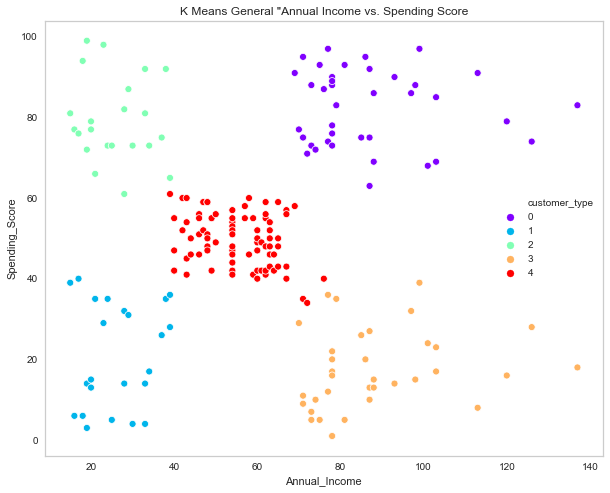

In [67]:
plt.figure(figsize=(10,8))
plt.title('K Means General "Annual Income vs. Spending Score')
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='customer_type', data=mall_is, palette='rainbow', legend='full')

### Clustering based on Age and Spending Score

#### *i. Creating a simplified dataset*

In [68]:
mall_as = mall.drop(columns = ['Gender', 'Annual_Income'], axis=1)
mall_as

,Age,Spending_Score
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40
...,...,...
196,35,79
197,45,28
198,32,74


In [69]:
hopkins(mall_as,mall_as.shape[0])

0.2847496257841594

#### *ii. Determine optimal number of clusters*

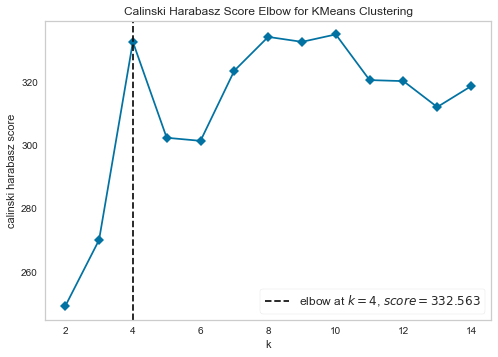

In [70]:
# Instantiate the clustering model and visualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,15), metric='calinski_harabasz', timings=False)

visualizer.fit(mall_as)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### *iii. Apply K Means*

In [71]:
k_means_as = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means_as.fit(mall_as)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
mall_as['customer_type']=k_means_as.labels_
mall_as.head(3)

,Age,Spending_Score,customer_type
CustomerID,,,
1,19,39,3
2,21,81,1
3,20,6,0


#### *iv. Visualizing and Labeling All the Clusters*

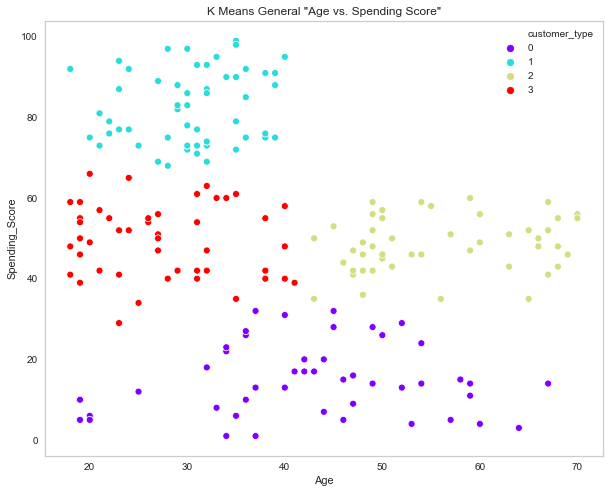

In [74]:
plt.figure(figsize=(10,8))
plt.title('K Means General "Age vs. Spending Score"')
sns.scatterplot(x='Age',y='Spending_Score',data=mall_as, hue='customer_type',palette='rainbow', legend='full')

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendrogram*

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering

In [76]:
mall_g.head()

,Age,Annual_Income,Spending_Score,customer_type
CustomerID,,,,
1,19,15,39,0
2,21,15,81,4
3,20,16,6,0
4,23,16,77,4
5,31,17,40,0


In [83]:
hc_complete_g = linkage(mall_g.drop(columns='customer_type', axis=1), "complete")
hc_ward_g = linkage(mall_g.drop(columns='customer_type', axis=1), "ward")

hc_complete_f = linkage(mall_f.drop(columns='customer_type', axis=1), "complete")
hc_ward_f = linkage(mall_f.drop(columns='customer_type', axis=1), "ward")

hc_complete_m = linkage(mall_m.drop(columns='customer_type', axis=1), "complete")
hc_ward_m = linkage(mall_m.drop(columns='customer_type', axis=1), "ward")

hc_complete_as = linkage(mall_as.drop(columns='customer_type', axis=1),'complete')
hc_ward_as = linkage(mall_as.drop(columns='customer_type', axis=1), "ward")

hc_complete_is = linkage(mall_is.drop(columns='customer_type', axis=1),'complete')
hc_ward_is = linkage(mall_is.drop(columns='customer_type', axis=1), "ward")

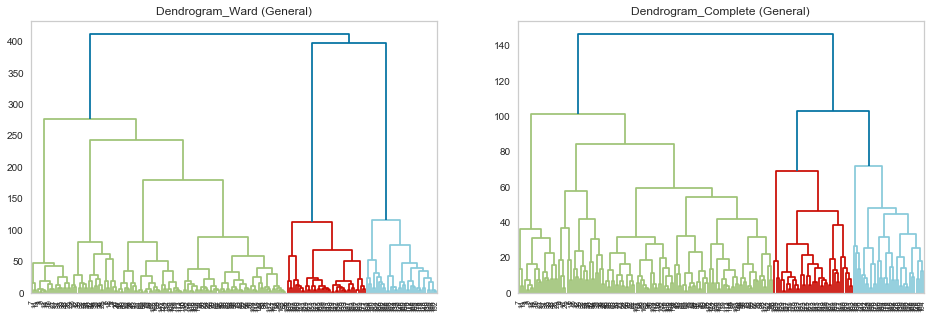

In [78]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].set_title('Dendrogram_Ward (General)')
dendrogram(hc_ward_g, leaf_font_size = 7, ax=ax[0])
ax[1].set_title('Dendrogram_Complete (General)')
dendrogram(hc_complete_g, leaf_font_size = 7, ax=ax[1])
plt.show()

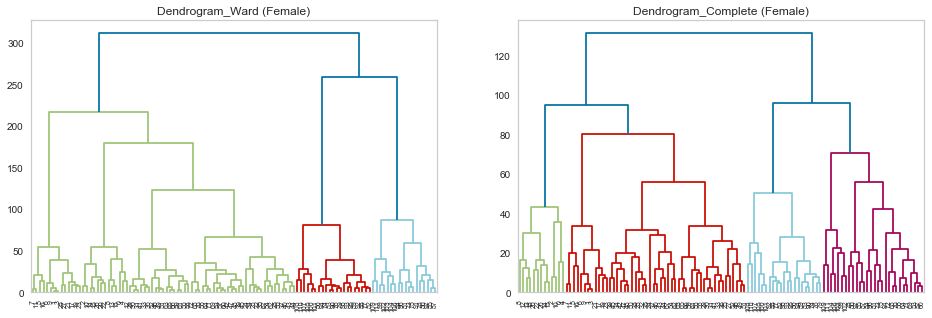

In [79]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].set_title('Dendrogram_Ward (Female)')
dendrogram(hc_ward_f, leaf_font_size = 7, ax=ax[0])
ax[1].set_title('Dendrogram_Complete (Female)')
dendrogram(hc_complete_f, leaf_font_size = 7, ax=ax[1])
plt.show()

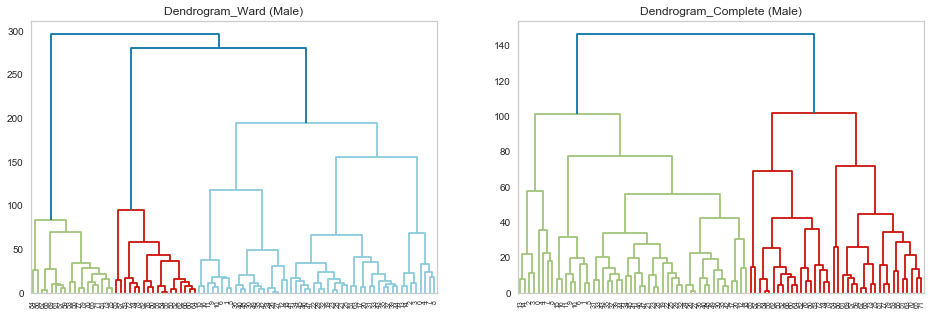

In [80]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].set_title('Dendrogram_Ward (Male)')
dendrogram(hc_ward_m, leaf_font_size = 7, ax=ax[0])
ax[1].set_title('Dendrogram_Complete (Male)')
dendrogram(hc_complete_m, leaf_font_size = 7, ax=ax[1])
plt.show()

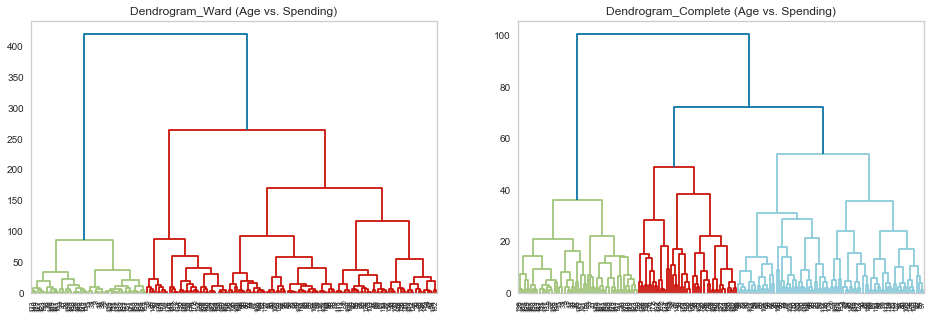

In [84]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].set_title('Dendrogram_Ward (Age vs. Spending)')
dendrogram(hc_ward_as, leaf_font_size = 7, ax=ax[0])
ax[1].set_title('Dendrogram_Complete (Age vs. Spending)')
dendrogram(hc_complete_as, leaf_font_size = 7, ax=ax[1])
plt.show()

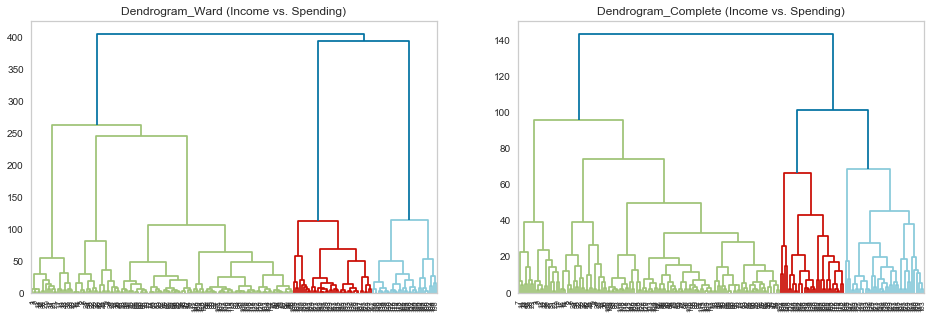

In [85]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].set_title('Dendrogram_Ward (Income vs. Spending)')
dendrogram(hc_ward_is, leaf_font_size = 7, ax=ax[0])
ax[1].set_title('Dendrogram_Complete (Income vs. Spending)')
dendrogram(hc_complete_is, leaf_font_size = 7, ax=ax[1])
plt.show()

#### ii. *Apply Agglomerative Clustering*

In [86]:
agg_model_as = AgglomerativeClustering(n_clusters=4, linkage = 'ward')

In [87]:
y_as = agg_model_as.fit_predict(mall_as)

In [88]:
mall_as['cluster'] = y_as
mall_as

,Age,Spending_Score,customer_type,cluster
CustomerID,,,,
1,19,39,3,0
2,21,81,1,3
3,20,6,0,2
4,23,77,1,3
5,31,40,3,0
...,...,...,...,...
196,35,79,1,3
197,45,28,0,0
198,32,74,1,3


In [90]:
agg_model_is = AgglomerativeClustering(n_clusters=5, linkage = 'ward')

In [91]:
y_is = agg_model_is.fit_predict(mall_is)

In [92]:
mall_is['cluster'] = y_is
mall_is.sample(6)

,Annual_Income,Spending_Score,customer_type,cluster
CustomerID,,,,
47,40,55,4,1
67,48,50,4,1
156,78,89,0,2
17,21,35,1,4
59,46,51,4,1
175,88,13,3,0


In [93]:
agg_model_g = AgglomerativeClustering(n_clusters=6, linkage = 'ward')

In [94]:
y_g = agg_model_g.fit_predict(mall_g)

In [96]:
mall_g['cluster'] = y_g
mall_g.sample(10)

,Age,Annual_Income,Spending_Score,customer_type,cluster
CustomerID,,,,,
169,36,87,27,2,0
183,46,98,15,2,0
138,32,73,73,1,2
200,30,137,83,1,2
149,34,78,22,2,0
32,21,30,73,4,3
191,34,103,23,2,0
26,29,28,82,4,3
94,40,60,40,3,4


In [97]:
agg_model_f = AgglomerativeClustering(n_clusters=6, linkage = 'ward')

In [98]:
y_f = agg_model_f.fit_predict(mall_f)

In [101]:
mall_f['cluster'] = y_f
mall_f.sample(10)

,Age,Annual_Income,Spending_Score,customer_type,cluster
CustomerID,,,,,
115,18,65,48,1,5
141,57,75,5,5,0
7,35,18,6,0,4
126,31,70,77,4,2
98,27,60,50,1,5
185,41,99,39,5,0
119,51,67,43,3,1
116,19,65,50,1,5
25,54,28,14,0,4


In [102]:
agg_model_m = AgglomerativeClustering(n_clusters=5, linkage = 'ward')

In [103]:
y_m = agg_model_m.fit_predict(mall_m)

In [104]:
mall_m['cluster'] = y_m
mall_m.sample(10)

,Age,Annual_Income,Spending_Score,customer_type,cluster
CustomerID,,,,,
131,47,71,9,3,1
157,37,78,1,3,1
170,32,87,63,1,2
114,19,64,46,2,0
145,25,77,12,3,1
22,25,24,73,2,0
56,47,43,41,4,4
104,26,62,55,2,0
31,60,30,4,0,3


#### iii. *Visualizing and Labeling All the Clusters* 

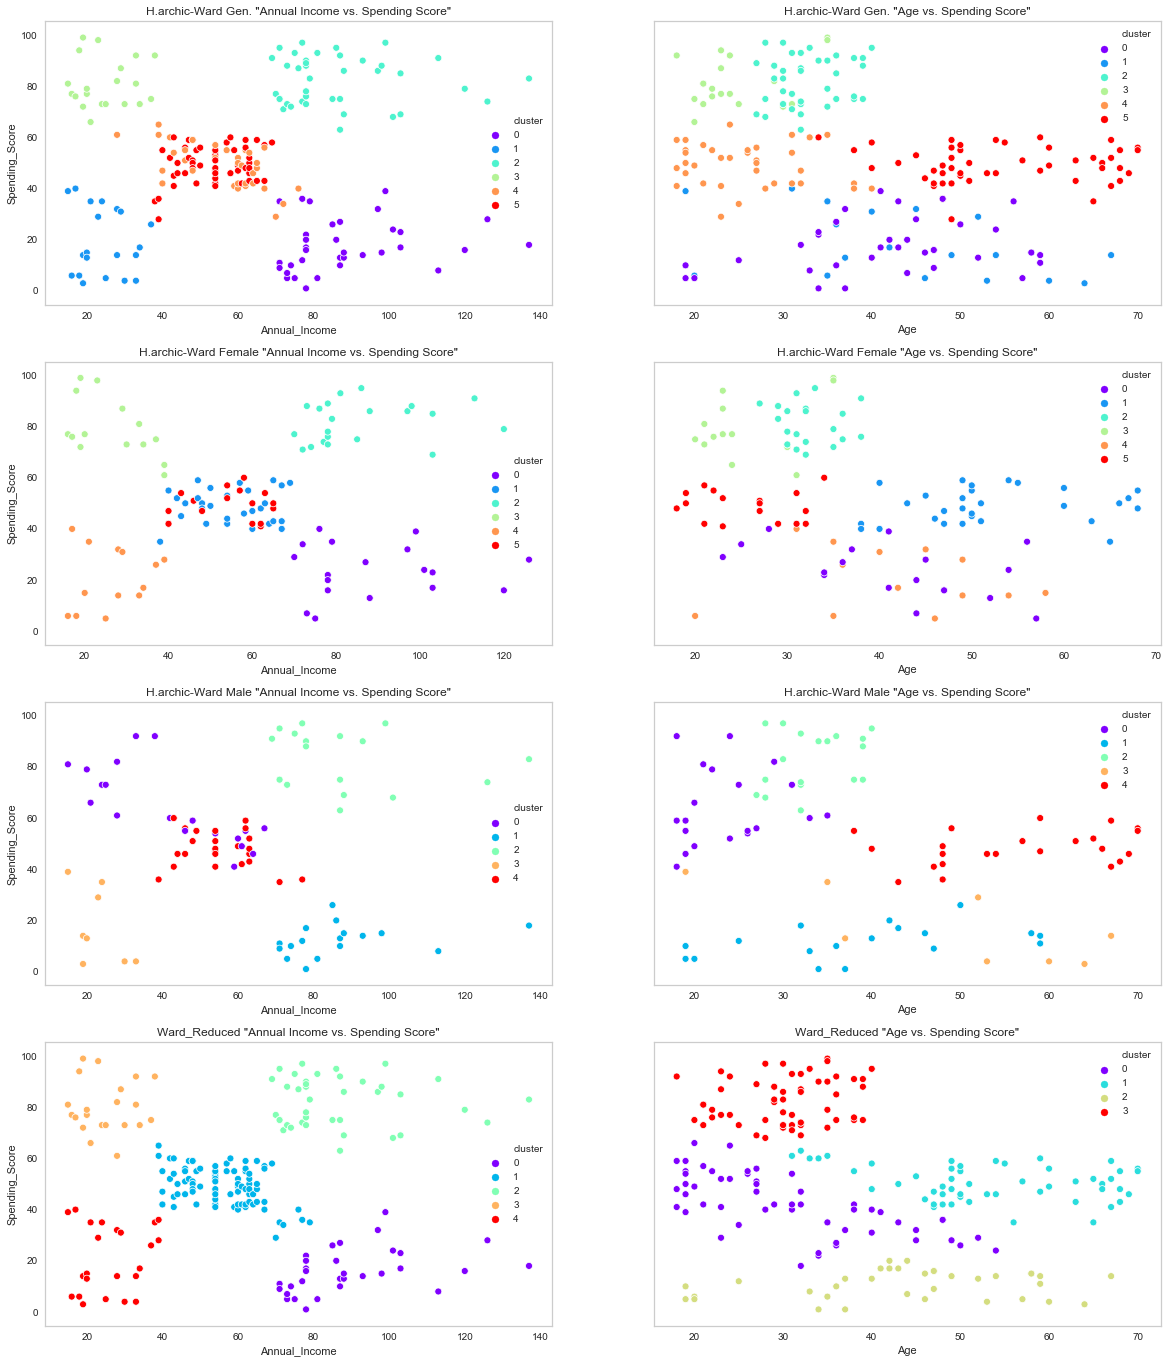

In [107]:
f, ax = plt.subplots(4,2, sharey=True, figsize=(20,24))
ax[0,0].set_title('H.archic-Ward Gen. "Annual Income vs. Spending Score"')
ax[0,1].set_title('H.archic-Ward Gen. "Age vs. Spending Score"')
ax[1,0].set_title('H.archic-Ward Female "Annual Income vs. Spending Score"')
ax[1,1].set_title('H.archic-Ward Female "Age vs. Spending Score"')
ax[2,0].set_title('H.archic-Ward Male "Annual Income vs. Spending Score"')
ax[2,1].set_title('H.archic-Ward Male "Age vs. Spending Score"')
ax[3,0].set_title('Ward_Reduced "Annual Income vs. Spending Score"')
ax[3,1].set_title('Ward_Reduced "Age vs. Spending Score"')
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=mall_g,palette='rainbow', legend='full', ax=ax[0,0])
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=mall_g,palette='rainbow', legend='full', ax=ax[0,1])
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=mall_f,palette='rainbow', legend='full', ax=ax[1,0])
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=mall_f,palette='rainbow', legend='full', ax=ax[1,1])
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=mall_m,palette='rainbow', legend='full', ax=ax[2,0])
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=mall_m,palette='rainbow', legend='full', ax=ax[2,1])
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=mall_is,palette='rainbow', legend='full', ax=ax[3,0])
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=mall_as,palette='rainbow', legend='full', ax=ax[3,1])

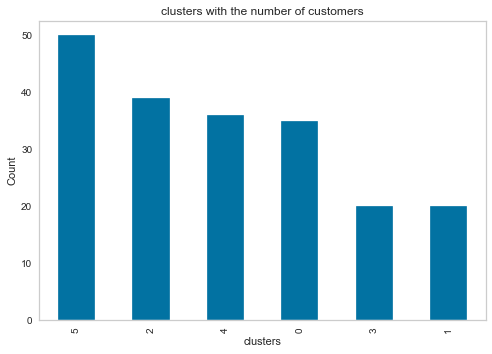

In [112]:
#lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
mall_g.cluster.value_counts().plot(kind='bar',)

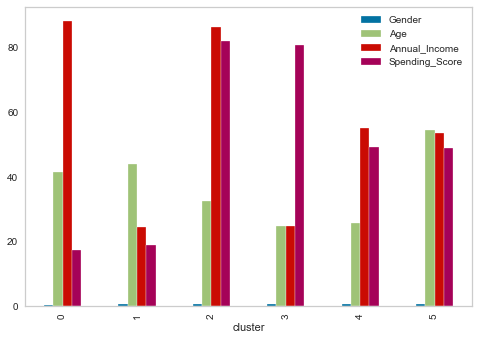

In [113]:
mall.groupby(mall_g.cluster).mean().plot(kind='bar')
plt.show()

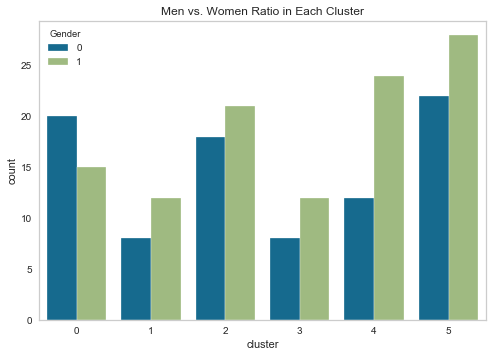

In [114]:
plt.title("Men vs. Women Ratio in Each Cluster")
plt.ylabel("Count")
sns.countplot(x=mall_g.cluster, hue=mall.Gender)
plt.show()

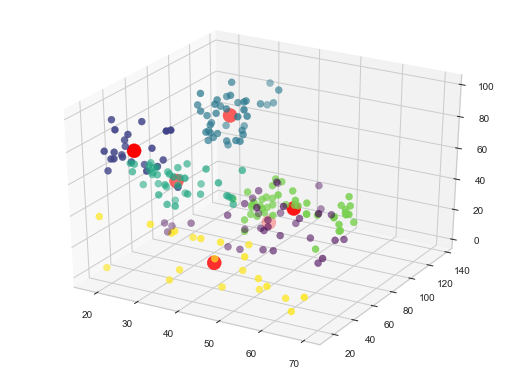

In [116]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=6).fit(mall_g)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mall_g.iloc[:,0],mall_g.iloc[:,1],mall_g.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [119]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
mall_g['clusters'] =  kmeans.labels_
trace1 = go.Scatter3d(
    x = mall_g['Age'],
    y = mall_g['Spending_Score'],
    z = mall_g['Annual_Income'],
    mode ='markers',
    marker = dict(color = mall_g['clusters'], size = 10, line = dict(color= mall_g['clusters'], width= 6), opacity = 0.8))
data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'),
                                                   yaxis = dict(title  = 'Spending Score (1-100)'),
                                                   zaxis = dict(title  = 'Annual Income (k$)')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

### Conclusion

#### 1st group(Yellow) : Low income, low spending score  **Normal Customers**
#### 2nd group(Red)    : Low income, high spending score **Target Customers**
#### 3rd group(Green)  : Moderate income, moderate spending score **Normal Customers**
#### 4th group(Blue)   : High income, low spending score **Potential Customers**
#### 5th group(Purple) : High income, high spending score **Target Customers**